# Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [36]:
retail_sales_data = pd.read_csv('L1T1_menu.csv')
retail_sales_data.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


# Data Cleaning

# Handling Missing Data

In [8]:
# Check for missing values
missing_values = retail_sales_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64


# Short Statistical Analysis

In [9]:
# Summary statistics for numerical columns
numerical_columns = retail_sales_data.select_dtypes(include=['float64', 'int64']).columns
statistics_summary = retail_sales_data[numerical_columns].describe()
print("\nSummary Statistics:\n", statistics_summary)


Summary Statistics:
           Calories  Calories from Fat   Total Fat  Total Fat (% Daily Value)  \
count   260.000000         260.000000  260.000000                 260.000000   
mean    368.269231         127.096154   14.165385                  21.815385   
std     240.269886         127.875914   14.205998                  21.885199   
min       0.000000           0.000000    0.000000                   0.000000   
25%     210.000000          20.000000    2.375000                   3.750000   
50%     340.000000         100.000000   11.000000                  17.000000   
75%     500.000000         200.000000   22.250000                  35.000000   
max    1880.000000        1060.000000  118.000000                 182.000000   

       Saturated Fat  Saturated Fat (% Daily Value)   Trans Fat  Cholesterol  \
count     260.000000                     260.000000  260.000000   260.000000   
mean        6.007692                      29.965385    0.203846    54.942308   
std         5.321

# Dealing with Outliers

In [10]:
# Identifying potential outliers using the IQR (Interquartile Range) method
Q1 = retail_sales_data[numerical_columns].quantile(0.25)
Q3 = retail_sales_data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

In [11]:
# Outliers are values outside the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
outliers = ((retail_sales_data[numerical_columns] < (Q1 - 1.5 * IQR)) | 
            (retail_sales_data[numerical_columns] > (Q3 + 1.5 * IQR))).sum()

print("\nOutliers detected:\n", outliers)


Outliers detected:
 Calories                          6
Calories from Fat                 4
Total Fat                         4
Total Fat (% Daily Value)         4
Saturated Fat                     0
Saturated Fat (% Daily Value)     0
Trans Fat                        56
Cholesterol                      18
Cholesterol (% Daily Value)      18
Sodium                            5
Sodium (% Daily Value)            5
Carbohydrates                    17
Carbohydrates (% Daily Value)    16
Dietary Fiber                     0
Dietary Fiber (% Daily Value)     4
Sugars                            4
Protein                           3
Vitamin A (% Daily Value)        17
Vitamin C (% Daily Value)        46
Calcium (% Daily Value)           2
Iron (% Daily Value)              2
dtype: int64


# Descriptive Statistics

In [12]:
# Summary statistics: Mean, Median, Mode, Standard Deviation, Variance for numerical features
descriptive_stats = retail_sales_data[numerical_columns].agg(['mean', 'median', 'std', 'var'])

In [13]:
# Mode calculation for numerical columns
modes = retail_sales_data[numerical_columns].mode().iloc[0]  # Take the first mode as mode might have multiple values

In [14]:
print("\nDescriptive Statistics (Mean, Median, Std, Variance):\n", descriptive_stats)
print("\nMode for numerical columns:\n", modes)


Descriptive Statistics (Mean, Median, Std, Variance):
             Calories  Calories from Fat   Total Fat  \
mean      368.269231         127.096154   14.165385   
median    340.000000         100.000000   11.000000   
std       240.269886         127.875914   14.205998   
var     57729.618355       16352.249406  201.810380   

        Total Fat (% Daily Value)  Saturated Fat  \
mean                    21.815385       6.007692   
median                  17.000000       5.000000   
std                     21.885199       5.321873   
var                    478.961925      28.322334   

        Saturated Fat (% Daily Value)  Trans Fat  Cholesterol  \
mean                        29.965385   0.203846    54.942308   
median                      24.000000   0.000000    35.000000   
std                         26.639209   0.429133    87.269257   
var                        709.647446   0.184155  7615.923300   

        Cholesterol (% Daily Value)         Sodium  ...  Carbohydrates  \
mean   

# Category and Item Analysis

# Distribution Analysis

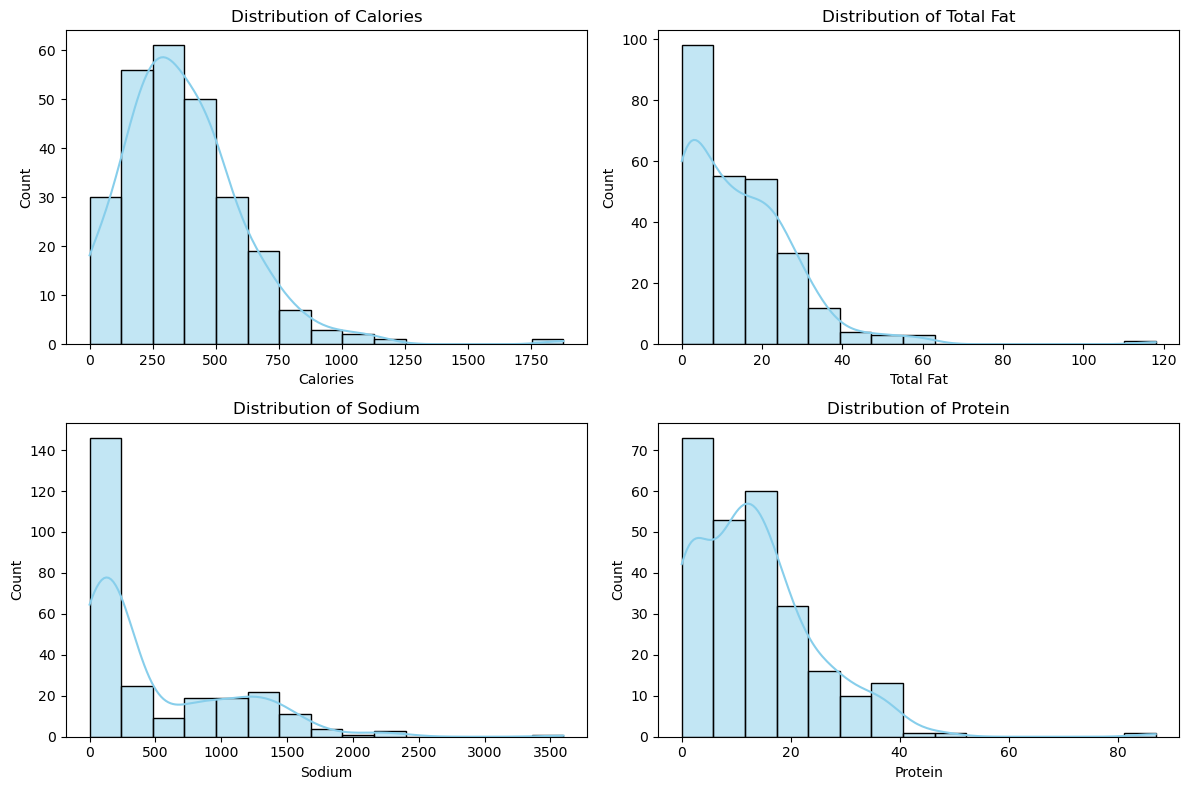

In [15]:
# Distribution analysis: Plotting histograms for key variables
key_columns = ['Calories', 'Total Fat', 'Sodium', 'Protein']  # Example of key variables
plt.figure(figsize=(12, 8))
for i, column in enumerate(key_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(retail_sales_data[column], kde=True, bins=15, color='skyblue')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Box Plot for Outliers

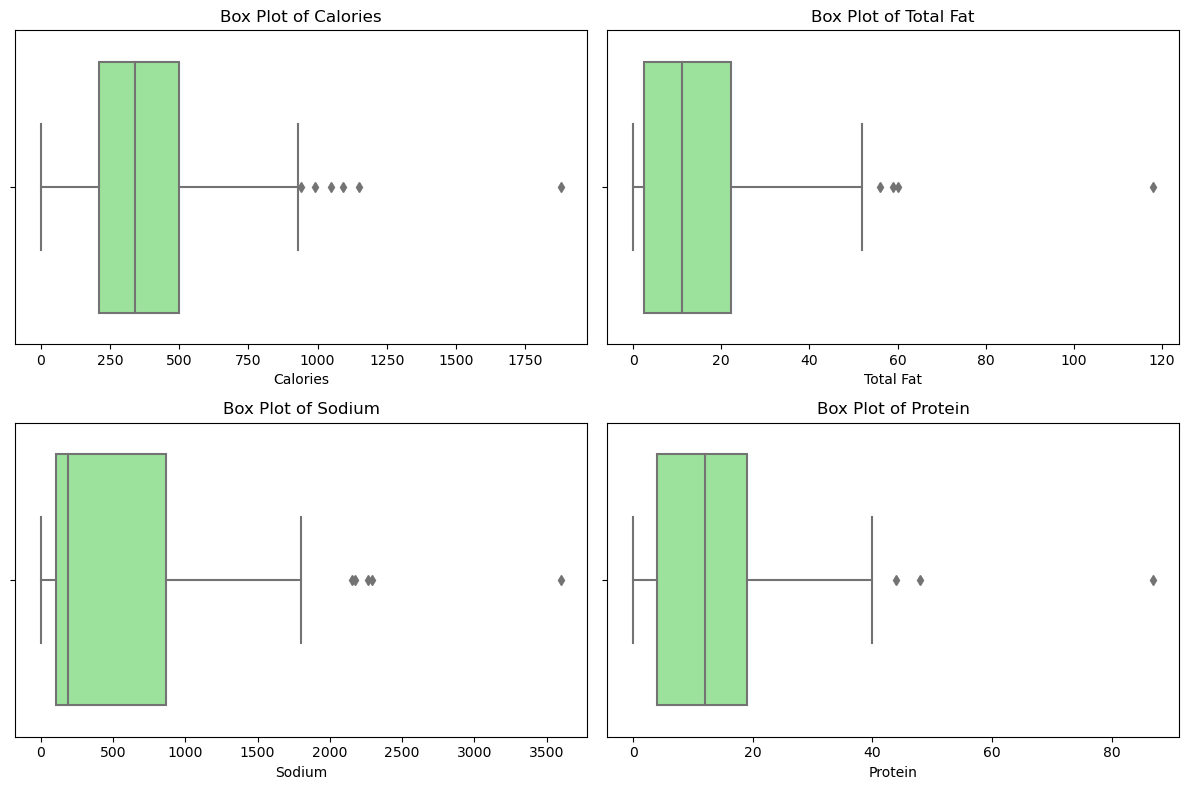

In [16]:
# Box plot to detect outliers for key numerical columns
plt.figure(figsize=(12, 8))
for i, column in enumerate(key_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=retail_sales_data[column], color='lightgreen')
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

In [17]:
# Top categories: Find the most frequent categories and count of items per category
top_categories = retail_sales_data['Category'].value_counts()
print("Top Categories by Item Count:\n", top_categories)


Top Categories by Item Count:
 Category
Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: count, dtype: int64


In [18]:
# Top items: Find the most frequent items
top_items = retail_sales_data['Item'].value_counts().head(10)
print("\nTop 10 Most Frequent Items:\n", top_items)



Top 10 Most Frequent Items:
 Item
Egg McMuffin                           1
Nonfat Latte (Small)                   1
Nonfat Latte (Large)                   1
Nonfat Caramel Latte (Small)           1
Nonfat Caramel Latte (Medium)          1
Nonfat Caramel Latte (Large)           1
Nonfat Hazelnut Latte (Small)          1
Nonfat Hazelnut Latte (Medium)         1
Nonfat Hazelnut Latte (Large)          1
Nonfat French Vanilla Latte (Small)    1
Name: count, dtype: int64


In [19]:
# Calorie distribution by category: Group by 'Category' and analyze calorie stats
calories_by_category = retail_sales_data.groupby('Category')['Calories'].agg(['mean', 'median', 'min', 'max', 'std'])

print("\nCalorie Distribution by Category:\n", calories_by_category)


Calorie Distribution by Category:
                           mean  median  min   max         std
Category                                                     
Beef & Pork         494.000000   500.0  240   750  141.360734
Beverages           113.703704   100.0    0   280   99.194764
Breakfast           526.666667   470.0  150  1150  221.675072
Chicken & Fish      552.962963   480.0  190  1880  306.541688
Coffee & Tea        283.894737   270.0    0   760  157.812808
Desserts            222.142857   250.0   45   340  108.083962
Salads              270.000000   255.0  140   450  127.436259
Smoothies & Shakes  531.428571   540.0  210   930  230.871365
Snacks & Sides      245.769231   260.0   15   510  141.772208


# Box Plot by Category

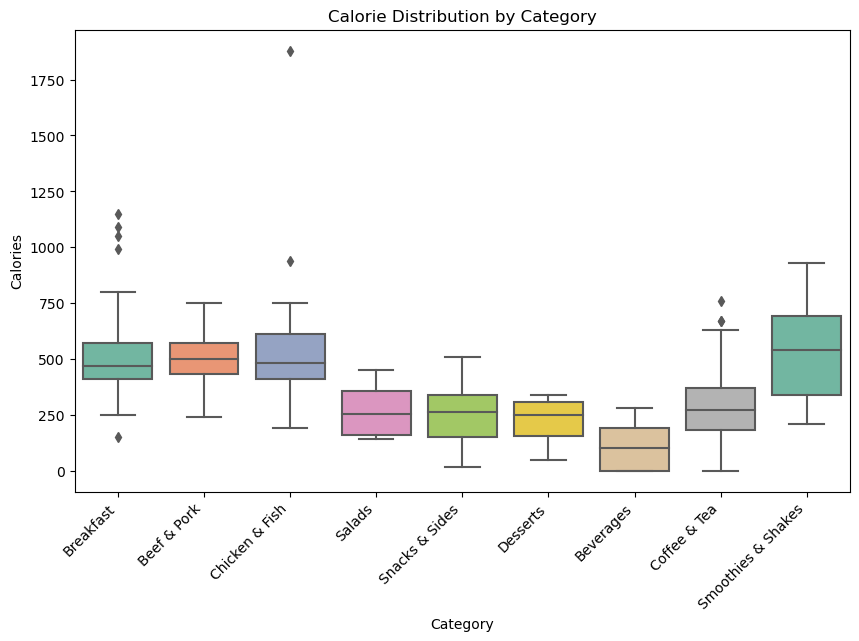

In [20]:
# Visualization: Boxplot of Calories by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Calories', data=retail_sales_data, palette="Set2")
plt.xticks(rotation=45, ha='right')
plt.title('Calorie Distribution by Category')
plt.show()

# Nutritional Component Analysis

In [21]:
# Fat and protein content analysis: Average fat and protein per category
fat_protein_by_category = retail_sales_data.groupby('Category')[['Total Fat', 'Protein']].mean()
print("Average Fat and Protein Content by Category:\n", fat_protein_by_category)


Average Fat and Protein Content by Category:
                     Total Fat    Protein
Category                                
Beef & Pork         24.866667  27.333333
Beverages            0.092593   1.333333
Breakfast           27.690476  19.857143
Chicken & Fish      26.962963  29.111111
Coffee & Tea         8.021053   8.863158
Desserts             7.357143   4.000000
Salads              11.750000  19.833333
Smoothies & Shakes  14.125000  10.857143
Snacks & Sides      10.538462   8.384615


In [22]:
# Correlation analysis between numerical variables (e.g., Fat, Calories, Protein, etc.)
correlation_matrix = retail_sales_data[['Calories', 'Total Fat', 'Protein', 'Sodium', 'Carbohydrates']].corr()

print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
                Calories  Total Fat   Protein    Sodium  Carbohydrates
Calories       1.000000   0.904409  0.787847  0.712309       0.781539
Total Fat      0.904409   1.000000  0.807773  0.846158       0.461213
Protein        0.787847   0.807773  1.000000  0.869802       0.352122
Sodium         0.712309   0.846158  0.869802  1.000000       0.200796
Carbohydrates  0.781539   0.461213  0.352122  0.200796       1.000000


# Heatmap for Correlation Analysis

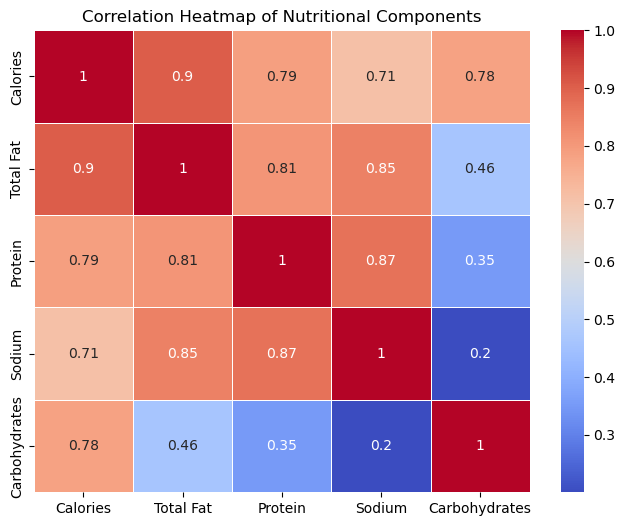

In [23]:
# Visualization: Heatmap for correlation analysis
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Nutritional Components')
plt.show()

In [24]:
# Daily Value Percentage analysis: Mean of daily value percentages across items
daily_value_columns = ['Total Fat (% Daily Value)', 'Saturated Fat (% Daily Value)', 'Cholesterol (% Daily Value)',
                       'Sodium (% Daily Value)', 'Carbohydrates (% Daily Value)', 
                       'Dietary Fiber (% Daily Value)', 'Vitamin A (% Daily Value)', 
                       'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']


In [25]:
# Calculate the mean daily value percentages for each nutrient
daily_value_mean = retail_sales_data[daily_value_columns].mean()

print("\nAverage Daily Value Percentages for Nutrients:\n", daily_value_mean)


Average Daily Value Percentages for Nutrients:
 Total Fat (% Daily Value)        21.815385
Saturated Fat (% Daily Value)    29.965385
Cholesterol (% Daily Value)      18.392308
Sodium (% Daily Value)           20.676923
Carbohydrates (% Daily Value)    15.780769
Dietary Fiber (% Daily Value)     6.530769
Vitamin A (% Daily Value)        13.426923
Vitamin C (% Daily Value)         8.534615
Calcium (% Daily Value)          20.973077
Iron (% Daily Value)              7.734615
dtype: float64


# Daily Value Percentages

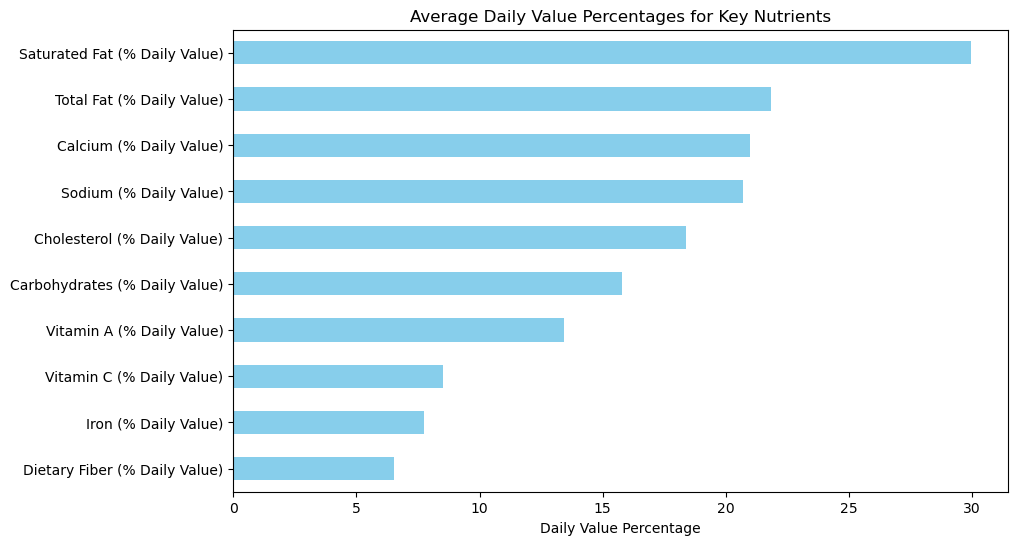

In [26]:
# Visualization: Bar plot of daily value percentages
plt.figure(figsize=(10, 6))
daily_value_mean.sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Daily Value Percentages for Key Nutrients')
plt.xlabel('Daily Value Percentage')
plt.show()

# Visualization

# Bar Charts

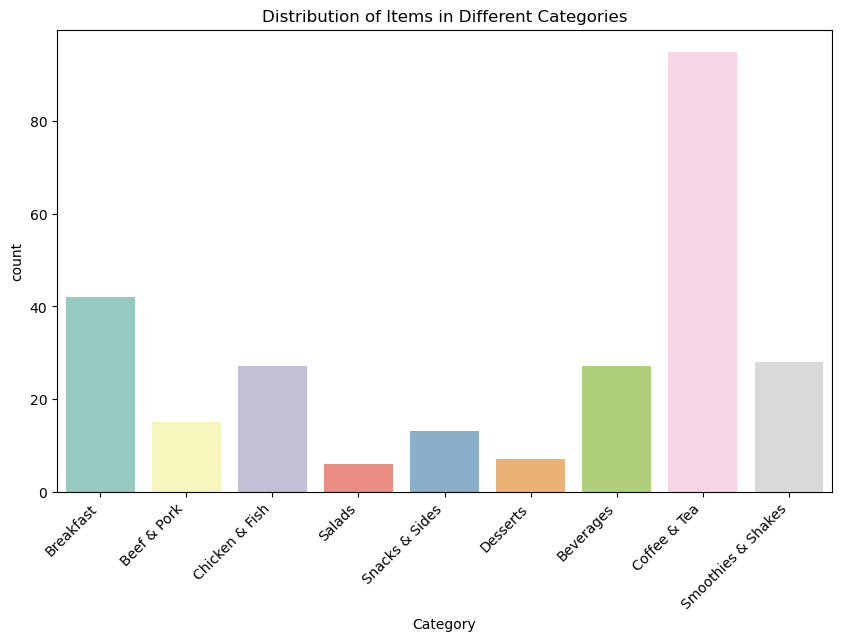

In [27]:
# Bar chart: Distribution of items in different categories
plt.figure(figsize=(10, 6))
sns.countplot(data=retail_sales_data, x='Category', palette='Set3')
plt.title('Distribution of Items in Different Categories')
plt.xticks(rotation=45, ha='right')
plt.show()

In [28]:
# Bar chart: Top 10 items with the highest calories, fats, and sodium content
top_10_calories = retail_sales_data.nlargest(10, 'Calories')[['Item', 'Calories']]
top_10_fat = retail_sales_data.nlargest(10, 'Total Fat')[['Item', 'Total Fat']]
top_10_sodium = retail_sales_data.nlargest(10, 'Sodium')[['Item', 'Sodium']]


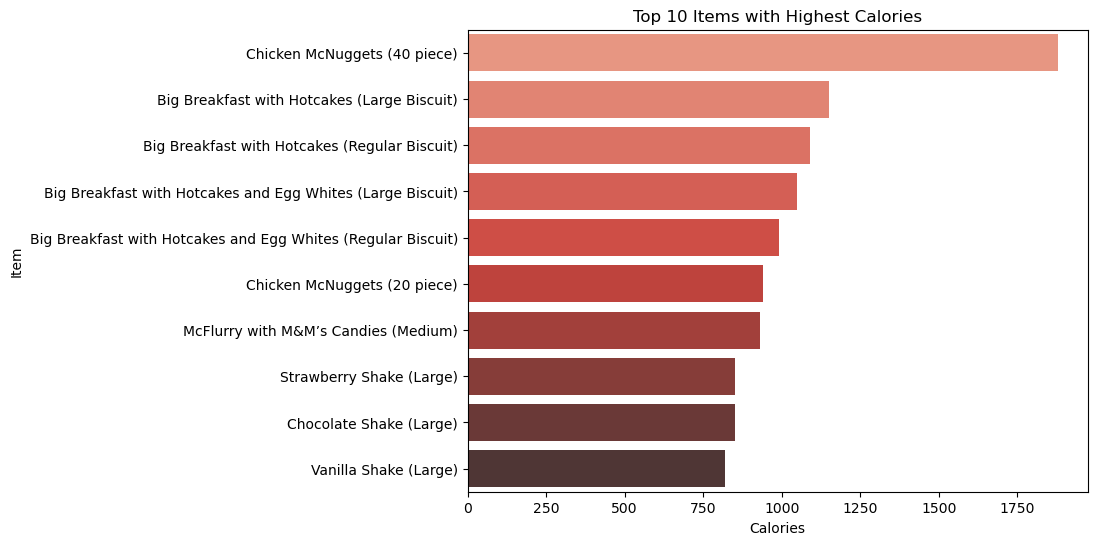

In [29]:
# Plot for top 10 highest calories items
plt.figure(figsize=(8, 6))
sns.barplot(data=top_10_calories, y='Item', x='Calories', palette='Reds_d')
plt.title('Top 10 Items with Highest Calories')
plt.show()


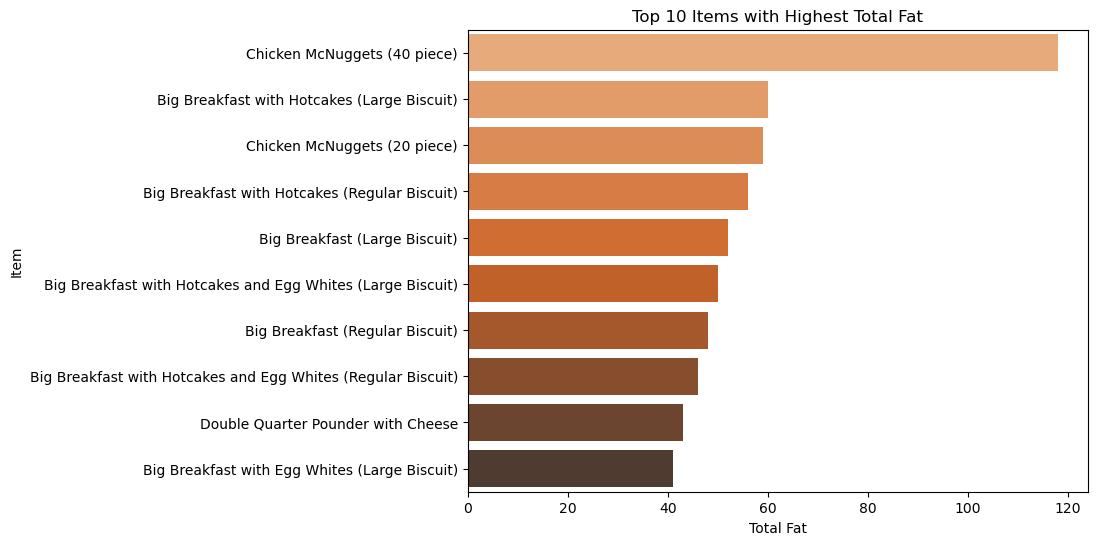

In [30]:
# Plot for top 10 highest fat items
plt.figure(figsize=(8, 6))
sns.barplot(data=top_10_fat, y='Item', x='Total Fat', palette='Oranges_d')
plt.title('Top 10 Items with Highest Total Fat')
plt.show()

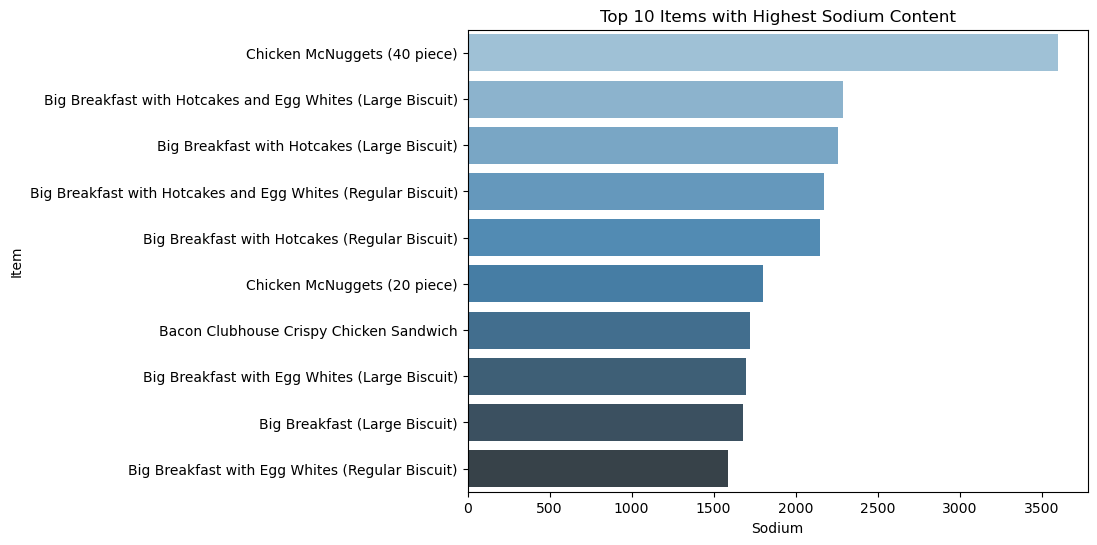

In [31]:
# Plot for top 10 highest sodium items
plt.figure(figsize=(8, 6))
sns.barplot(data=top_10_sodium, y='Item', x='Sodium', palette='Blues_d')
plt.title('Top 10 Items with Highest Sodium Content')
plt.show()

# Histograms

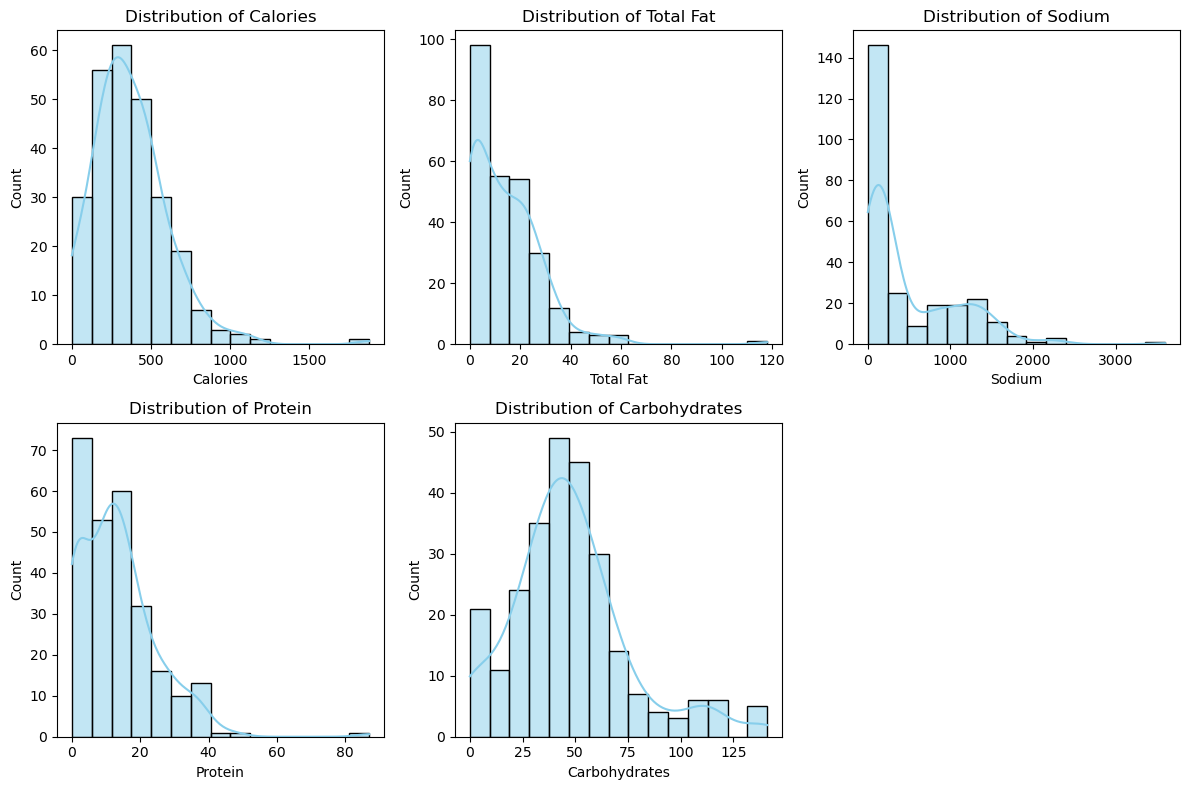

In [32]:
# Histograms: Plot distribution of numerical variables like calories, total fat, sodium
numerical_columns = ['Calories', 'Total Fat', 'Sodium', 'Protein', 'Carbohydrates']

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(retail_sales_data[column], kde=True, bins=15, color='skyblue')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Heatmap

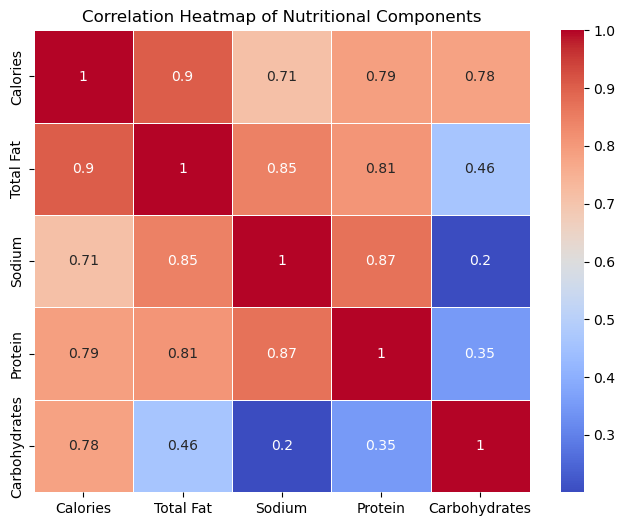

In [33]:
# Heatmap: Correlation between different numerical variables
correlation_matrix = retail_sales_data[['Calories', 'Total Fat', 'Sodium', 'Protein', 'Carbohydrates']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Nutritional Components')
plt.show()